# Symulacja sondażu wyborczego z uwzględnieniem regionów

In [1]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Określ ile gmin brać pod uwagę w danej próbie
ILOSC_GMIN_PROBKA_1 = 150
ILOSC_GMIN_PROBKA_2 = 100
ILOSC_GMIN_PROBKA_3 = 10
ILOSC_GMIN_PROBKA_4 = 1

In [3]:
# Wczytanie danych
df = pd.read_csv("wyniki_gl_na_kandydatow_po_gminach_utf8.csv", sep=';')
# Wygenerowanie listy gmin
lista_gmin = df['Gmina'].unique()

In [4]:
# Określenie danych z pliku do wyciągnięcia
do_wyciagniecia = [
    "Gmina",
    "TRZASKOWSKI Rafał Kazimierz",
    "NAWROCKI Karol Tadeusz",
    "MENTZEN Sławomir Jerzy",
    "BARTOSZEWICZ Artur",
    "BIEJAT Magdalena Agnieszka",
    "BRAUN Grzegorz Michał",
    "HOŁOWNIA Szymon Franciszek",
    "JAKUBIAK Marek",
    "MACIAK Maciej",
    "SENYSZYN Joanna",
    "STANOWSKI Krzysztof Jakub",
    "WOCH Marek Marian",
    "ZANDBERG Adrian Tadeusz"
]

In [5]:
# Losowanie określonej liczby gmin do sondażu
probka_1 = random.sample(list(lista_gmin), ILOSC_GMIN_PROBKA_1)
probka_2 = random.sample(list(lista_gmin), ILOSC_GMIN_PROBKA_2)
probka_3 = random.sample(list(lista_gmin), ILOSC_GMIN_PROBKA_3)
probka_4 = random.sample(list(lista_gmin), ILOSC_GMIN_PROBKA_4)

# Filtrowanie danych
df_probka_1 = df[df['Gmina'].isin(probka_1)][do_wyciagniecia]
df_probka_2 = df[df['Gmina'].isin(probka_2)][do_wyciagniecia]
df_probka_3 = df[df['Gmina'].isin(probka_3)][do_wyciagniecia]
df_probka_4 = df[df['Gmina'].isin(probka_4)][do_wyciagniecia]

# 
probki = {
    "1": probka_1,
    "2": probka_2,
    "3": probka_3,
    "4": probka_4
}

#
wyniki_probek = {}

In [6]:
for nazwa_probki, lista_gmin in probki.items():
    df_probka = df[df['Gmina'].isin(lista_gmin)][do_wyciagniecia]
    
    glosy_z_gmin = {
        "Trz": int(df_probka["TRZASKOWSKI Rafał Kazimierz"].sum()),
        "Naw": int(df_probka["NAWROCKI Karol Tadeusz"].sum()),
        "Men": int(df_probka["MENTZEN Sławomir Jerzy"].sum()),
        "Bra": int(df_probka["BRAUN Grzegorz Michał"].sum()),
        "Hol": int(df_probka["HOŁOWNIA Szymon Franciszek"].sum()),
        "Zan": int(df_probka["ZANDBERG Adrian Tadeusz"].sum()),
        "Bie": int(df_probka["BIEJAT Magdalena Agnieszka"].sum()),
        "Sta": int(df_probka["STANOWSKI Krzysztof Jakub"].sum()),
        "Sen": int(df_probka["SENYSZYN Joanna"].sum()),
        "Jak": int(df_probka["JAKUBIAK Marek"].sum()),
        "Bar": int(df_probka["BARTOSZEWICZ Artur"].sum()),
        "Mac": int(df_probka["MACIAK Maciej"].sum()),
        "Woc": int(df_probka["WOCH Marek Marian"].sum())
    }

    # Zainicjowanie listy głosów
    lista_glosow = []
    # Dla każdego kandydata stwórz listę zawierającą jego skrót powtórzony tyle razy, ile ma głosów
    # Wszystkie listy dołącz do lista_glosow
    for kandydat, liczba_glosow in glosy_z_gmin.items():
        lista_glosow.extend([kandydat] * liczba_glosow)

    wyniki_probek[nazwa_probki] = {
        "gminy": lista_gmin,
        "glosy_sumowane": glosy_z_gmin,
        "lista_glosow": lista_glosow
    }

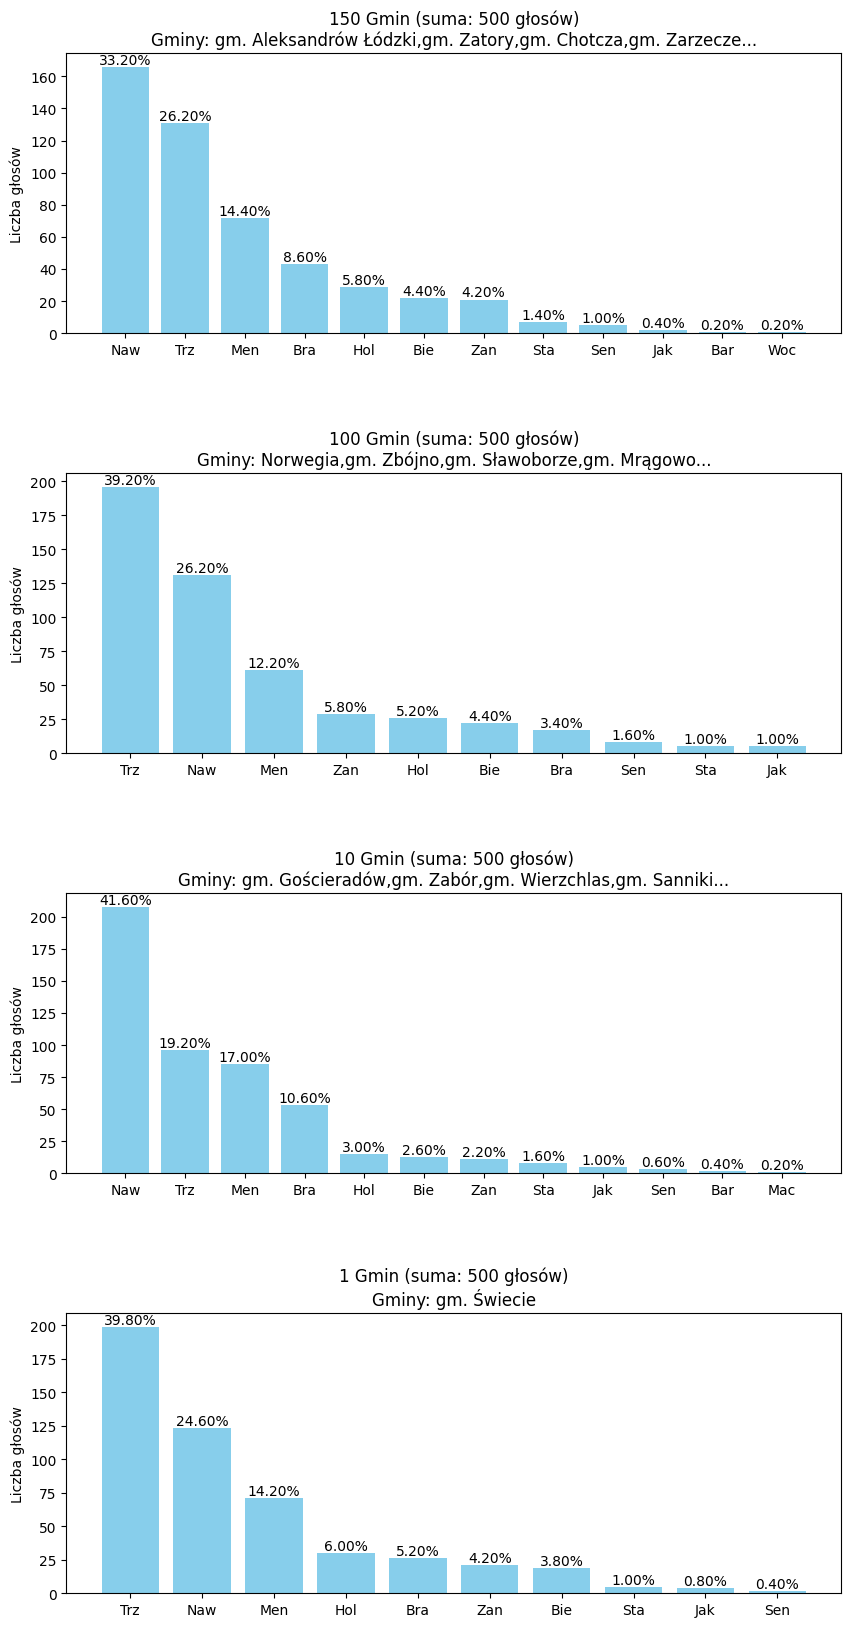

In [7]:
# Liczba głosów dla danej próbki
MAX_GLOSOW = 500

# Przygotowanie czterech wykresów, ułożonych pionowo jeden pod drugim
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

# Iteracja jednocześnie po każdym wykresie oraz odpowiadającej mu próbce danych
# axs to lista osi, a probki to lista krotek (nazwa, probka)
for ax, (nazwa, dane) in zip(axs, wyniki_probek.items()):
    lista_glosow = dane["lista_glosow"]
    if len(lista_glosow) > MAX_GLOSOW:
        lista_glosow = random.sample(lista_glosow, MAX_GLOSOW)
    lista_gmin = dane["gminy"]
    # Liczenie głosów w danej próbce za pomocą Counter
    licznik_probki = Counter(lista_glosow)
    # Sortowanie wyników malejąco według liczby głosów
    posortowana_probka = sorted(licznik_probki.items(), key=lambda x: x[1], reverse=True)
    # Rozpakowanie posortowanych danych na osobne listy
    posortowani_kandydaci, posortowane_glosy = zip(*posortowana_probka)
    # Obliczenie sumy dla późniejszego liczenia procentów
    suma_glosow = sum(posortowane_glosy)

    # Rysowanie wykresu słupkowego i zapisanie obiektów słupków do zmiennej bars
    bars = ax.bar(posortowani_kandydaci, posortowane_glosy, color='skyblue')

    skrocone_gminy = ','.join(lista_gmin[:4]) + ('...' if len(lista_gmin) > 4 else '')
    
    # Dodanie tytułu wykresu oraz pospisu osi y
    ax.set_title(f"{len(dane['gminy'])} Gmin (suma: {suma_glosow:,} głosów)\nGminy: {skrocone_gminy}")
    ax.set_ylabel(f"Liczba głosów")

    # Iteracja jednocześnie po słupkach w zmiennej bars oraz po liczbach głosów w krotce posortowane_glosy
    for bar, glosy_kandydata in zip(bars, posortowane_glosy):
        wysokosc = bar.get_height()
        # Obliczenie procentów
        procent = glosy_kandydata / suma_glosow * 100
        # plt.text(x, y, tekst) dodaje tekst do wykresu w punkcie o współrzędnych (x, y)
        # w tym przypadku ax.text umiescza wartości procentowe nad każdym słupkiem
        ax.text(bar.get_x() + bar.get_width()/2, wysokosc, f"{procent:.2f}%", ha='center', va='bottom')

plt.show()